### Cargando modulos y preparando el ambiente de trabajo

In [1]:
# Cargando módulos
# ---------------------------------------------------------------------------------------
# Configuración warnings
# Importando módulo warnings
import warnings

# Ignorar warnings
warnings.filterwarnings("ignore")

# Importando importOrInstall function desde el modulo lib.functChecModule
from lib.functChecModule import importOrInstall

# Use the importOrInstall function para validar si el modulo 'yaml' module se encuentra instalado, y si es necesario lo instala
importOrInstall("yaml")

# Use the importOrInstall function para validar si el modulo 'skimpy' module se encuentra instalado, y si es necesario lo instala
importOrInstall('skimpy')

In [2]:
# Manipulando datos
# Importando varios modulos de la modulo pandas
from pandas import DataFrame, read_csv, set_option, option_context, Series

# Importando varios modulos de la modulo numpy
from numpy import nan, where

# Importando la clase SafeLoader desde el modulo yaml.loader
from yaml.loader import SafeLoader

# Importando los modulos json y yaml
import json
import yaml

# Importando el modulo statistics
import statistics

# Importando la funcion clean_columns desde el modulo skimpy
from skimpy import clean_columns

# Importando el modulo missingno y asignando un alias msno
import missingno as msno

# Importando el modulo pickle
import pickle

# Importando los modulos os y glob
import os
import glob

# Importando varios modulos de la modulo psycopg2
# import psycopg2
# from psycopg2 import connect, extensions, sql

# Importando la funcion create_engine desde la modulo sqlalchemy
# from sqlalchemy import create_engine

# Importando la funcion haversine desde el modulo haversine
from haversine import haversine

# Importando funciones custom custom desde el modulo lib.functDescriptiveAnalysis 
from lib.functDescriptiveAnalysis import inspectDataFrameDA, countNaNDA

# Importando funciones custom custom desde el modulo lib.functCleanData
from lib.functCleanData import convert_float, whitespaceRemover

# Importando el modulo seaborn y asignando un alias sns
import seaborn as sns

In [3]:
# Preparando los datos
# ---------------------------------------------------------------------------------------
# Cargando datos
purchase_order = read_csv('data/input/1_Orden_compra.csv', sep = ';', encoding='utf-8')
product_order = read_csv('data/input/2_Orden_productos.csv', sep = ';', encoding='utf-8')
shopper = read_csv('data/input/3_Recolector.csv', sep = ';', encoding='utf-8')
store = read_csv('data/input/4_tienda.csv', sep = ';', encoding='utf-8')

In [4]:
# Inspeccion visual
# ---------------------------------------------------------------------------------------
# Revisando estructura del dataset purchase_order
print("\n\033[1mEstructura del dataset: purchase_order\033[0m\n")
purchase_order.info()
print("\n\033[1mEstructura del dataset: product_order\033[0m\n")
product_order.info()
print("\n\033[1mEstructura del dataset: shopper\033[0m\n")
shopper.info()
print("\n\033[1mEstructura del dataset: store\033[0m\n")
store.info()


Estructura del dataset: purchase_order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7295 entries, 0 to 7294
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   order_id         7295 non-null   object
 1   lat              7295 non-null   object
 2   lng              7295 non-null   object
 3   dow              7295 non-null   int64 
 4   promised_time    7295 non-null   object
 5   actual_time      7295 non-null   object
 6   on_demand        7295 non-null   bool  
 7   picker_id        7295 non-null   object
 8   driver_id        7295 non-null   object
 9   store_branch_id  7295 non-null   object
 10  total_minutes    6543 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 577.2+ KB

Estructura del dataset: product_order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120876 entries, 0 to 120875
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  -----

In [5]:
# Revisando dataset purchase_order
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
    # Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(purchase_order.head(n = 3))

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes
0,6abd5e28d01b7c733fe37485294235dc,1.822.114.109.606.680,-10.031.391.366.664.600,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800.861
1,0d37a1eea001f01b40232ffd496ff663,18.177.712.202.580.300,-10.035.705.073.096.900,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599.732
2,528428e9b9eb5d3bd0dbdd8da692b087,1.826.683.205.404.410,-10.031.755.280.890.600,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458.001


In [6]:
# Revisando dataset product_order
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
    # Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(product_order.head(n = 3))

,order_id,product_id,quantity,quantity_found,buy_unit
0,bdfc44fb525986b7bab8c589fc47e853,ab9757d9892b0e83ab3a1c1af0c84c52,0.75,0.155,KG
1,bdfc44fb525986b7bab8c589fc47e853,f1f042251bf634d44f338fbaf13b16e4,0.3,0.400,KG
2,bdfc44fb525986b7bab8c589fc47e853,0630d47440965509b0b3f80fd1b3578f,1,1.000,UN


In [7]:
# Revisando dataset shopper
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
    # Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(shopper.head(n = 3))

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.48
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.79
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.84


In [8]:
# Revisando dataset store
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
    # Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(store.head(n = 3))

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3,1.827.282.968.914.450,-10.031.881.435.593.900
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64,18.273.494.015.704.800,-10.031.958.539.978.200


In [9]:
# Análisis descriptivo de las columnas del dataset
inspectDataFrameDA(purchase_order)

Medidas descriptivas de variables float64 e int64

      count   mean    std  min  25%  50%  75%  max
dow  7295.0  2.783  1.742  0.0  1.0  3.0  4.0  6.0

Freecuencia de variables distintas a float64 e int64

Nombre de variable: order_id, frecuencia: 
                                  total  percent
6abd5e28d01b7c733fe37485294235dc      1      0.0
e7449e7a2c2cbe3e71eb4c313ca06650      1      0.0
a831d42a12d9e5581f0ae8dfd8eefc69      1      0.0
57e14a67d26f47ce05af2fe2e537d556      1      0.0
7f57e5a0e6fdd748e449e700c7ef5c19      1      0.0
...                                 ...      ...
93fa6384f84da0d72f96b10b8bae6820      1      0.0
b9a01a2c738217bd3271293294004d9e      1      0.0
62642a917e9e2af4f123dc5660705af9      1      0.0
568bdbca1d3cdafc75ab3f20da2155ba      1      0.0
7ffa2d60aea99143b28564d737ca4b2b      1      0.0

[7295 rows x 2 columns]

Nombre de variable: lat, frecuencia: 
                        total  percent
1.822.114.109.606.680       1      0.0
18.288.950.840.081.

In [10]:
# Análisis descriptivo de las columnas del dataset
inspectDataFrameDA(product_order)

Medidas descriptivas de variables float64 e int64

                   count   mean    std  min    25%  50%    75%    max
quantity_found  120876.0  1.282  1.618  0.0  0.915  1.0  1.015  120.0

Freecuencia de variables distintas a float64 e int64

Nombre de variable: order_id, frecuencia: 
                                  total  percent
22854d4e3f47c4d35d7dab956031b146    118    0.001
fbc4b323369bbcaff344c34616912d0a    109    0.001
0d37a1eea001f01b40232ffd496ff663    103    0.001
67720285179e3924bf7793e7002f52d7    103    0.001
c9c19b5c8113cccb3598d9d5ab4dc625     98    0.001
...                                 ...      ...
f19aa6cf334f5e590f59b991d3e9eb0f      1    0.000
585cdb18f0976e3b04c8db98ec53c1f0      1    0.000
70068ef9ba44c45170e72ecb1f0ad669      1    0.000
68c9dabc99e5765967f0fe2a28512677      1    0.000
354d07b428432bca7daad0b33b8359ed      1    0.000

[7278 rows x 2 columns]

Nombre de variable: product_id, frecuencia: 
                                  total  percent
52b

In [11]:
# Análisis descriptivo de las columnas del dataset
inspectDataFrameDA(purchase_order)

Medidas descriptivas de variables float64 e int64

      count   mean    std  min  25%  50%  75%  max
dow  7295.0  2.783  1.742  0.0  1.0  3.0  4.0  6.0

Freecuencia de variables distintas a float64 e int64

Nombre de variable: order_id, frecuencia: 
                                  total  percent
6abd5e28d01b7c733fe37485294235dc      1      0.0
e7449e7a2c2cbe3e71eb4c313ca06650      1      0.0
a831d42a12d9e5581f0ae8dfd8eefc69      1      0.0
57e14a67d26f47ce05af2fe2e537d556      1      0.0
7f57e5a0e6fdd748e449e700c7ef5c19      1      0.0
...                                 ...      ...
93fa6384f84da0d72f96b10b8bae6820      1      0.0
b9a01a2c738217bd3271293294004d9e      1      0.0
62642a917e9e2af4f123dc5660705af9      1      0.0
568bdbca1d3cdafc75ab3f20da2155ba      1      0.0
7ffa2d60aea99143b28564d737ca4b2b      1      0.0

[7295 rows x 2 columns]

Nombre de variable: lat, frecuencia: 
                        total  percent
1.822.114.109.606.680       1      0.0
18.288.950.840.081.

In [12]:
# Análisis descriptivo de las columnas del dataset
inspectDataFrameDA(shopper)

Medidas descriptivas de variables float64 e int64

               count   mean    std    min    25%    50%    75%    max
found_rate     564.0  0.852  0.038  0.651  0.831  0.854  0.877  0.953
picking_speed  600.0  2.091  0.638  0.800  1.610  2.000  2.380  4.660
accepted_rate  594.0  0.953  0.076  0.200  0.921  0.960  1.000  1.000
rating         566.0  4.791  0.164  3.200  4.712  4.820  4.920  5.000

Freecuencia de variables distintas a float64 e int64

Nombre de variable: shopper_id, frecuencia: 
                                  total  percent
087ab65ceca40dbef697f585dc159d5d      1    0.002
755c1ee6d23173214f870b472bd433c1      1    0.002
8e45f2e4e004e29cc15f1d06b4267055      1    0.002
b3c4a1079dad6c47b97244fab199c51f      1    0.002
9d1ef1fd8de0c0d613974d3cf54748ee      1    0.002
...                                 ...      ...
5843ad69be3bed76ca8a2c931e455d9f      1    0.002
4f113718e4c94140dff968f7dfd8456b      1    0.002
e3dc65dd330265af648643e4c397afef      1    0.002
1c6f5b023

In [13]:
# Análisis descriptivo de las columnas del dataset
inspectDataFrameDA(store)

Medidas descriptivas de variables float64 e int64


Freecuencia de variables distintas a float64 e int64

Nombre de variable: store_branch_id, frecuencia: 
                                  total  percent
cf0895f1e3beb8164f0a86e6f940ae56      1    0.009
15bf16e04b6f5e730f38a7c6a4b47f21      1    0.009
5a6dd51ef5ed276079b6a102d4ceb8f6      1    0.009
41ca3a65599fb02ab0d0cdd23da1e922      1    0.009
1fc727dd540d924d2370b4d6ec0149fd      1    0.009
...                                 ...      ...
00868095685ee799fb5c158e8d081fe1      1    0.009
f82a21e295c90ae7bf09e1870b66edb8      1    0.009
0cdeb3c8700028cdf750409d66e354da      1    0.009
41d9a054007bfce5cd838d2f9b2d7db3      1    0.009
82862bb4ff9734b6f8fee2dcde6be96f      1    0.009

[113 rows x 2 columns]

Nombre de variable: store, frecuencia: 
                                  total  percent
452ae015bf846e1d2932b7ea15720d64     19    0.168
9d65282d498c0338377867996e761399     15    0.133
c0b93cf93cf854981b8d6bd849eec4b0     12    0

# Planteando hipótesis para entender los datos

In [14]:
# product_order.columns
# purchase_order.columns
# store.columns
# shopper.columns

In [15]:
# lista variables cargadas
# %whos

## dataset **product_order**
1. ¿Qué tipo de unidades tenemos en la columna `buy_unit`? <br>
1. ¿Todos los productos de una orden tienen existencias? <br>
1. ¿Tiene valores perdidos? <br>

In [16]:
print("Existen productos con las siguientes unidades: {}".format(', '.join(product_order.buy_unit.unique())))

Existen productos con las siguientes unidades: KG, UN


In [17]:
# El siguiente código crea un dataframe llamado df2 a partir de otro dataframe llamado product_order.
# Luego, agrupa los datos del dataframe product_order por el id de orden y aplica una función lambda a cada grupo.
# La función lambda crea una serie que contiene diferentes columnas, que se calculan a  partir de la columna buy_unit 
# y quantity_found del dataframe g. También se hace un reset del índice del dataframe df2.
df2 = DataFrame(product_order.groupby('order_id')
 .apply(lambda g: Series({
     'total_product': g.product_id.count(),
     'total_unit': where(g.buy_unit == 'UN', g.quantity_found, 0).sum(),
     'total_prod_unit': where(g.buy_unit == 'UN', 1, 0).sum(),
     'total_kg': where(g.buy_unit == 'KG', g.quantity_found, 0).sum(),
     'total_prod_kg': where(g.buy_unit == 'KG', 1, 0).sum(),
     'without_product': where(g.quantity_found == 0, 1, 0).sum()
})))
df2.reset_index(inplace=True, level=['order_id'])

In [18]:
# Validando productos con existencias en la ruta realizada por el picker
df2[df2['without_product'] > 0]

,order_id,total_product,total_unit,total_prod_unit,total_kg,total_prod_kg,without_product
0,001ef94c50c71cb0e674b6293e9b6068,35.0,31.0,30.0,3.515,5.0,5.0
2,002b6dcb32fef90ebb1cb691afe6a413,9.0,10.0,9.0,0.000,0.0,2.0
4,002f97bd7dad0d275d8511436c18b572,11.0,35.0,7.0,4.090,4.0,1.0
6,0031746e47016a88e7787ce3538aef6f,58.0,73.0,51.0,6.740,7.0,16.0
9,007cc93f200b8a4257e57a96b1af90d5,2.0,1.0,2.0,0.000,0.0,1.0
...,...,...,...,...,...,...,...
7272,ffde425b5643adaad04172cb0c1e7aca,7.0,19.0,7.0,0.000,0.0,1.0
7273,ffe5b0edbae4925bc9aac924d73647bb,21.0,39.0,21.0,0.000,0.0,3.0
7274,ffe6c331d8812a9dba92d01103b694e6,29.0,32.0,18.0,9.450,11.0,3.0
7275,ffeeac3eeb1135973c22d025a10daa16,22.0,30.0,16.0,8.560,6.0,4.0


In [19]:
# Validando productos sin existencias en la ruta realizada por el picker
product_order[product_order['quantity_found'] == 0].groupby('order_id').product_id.size().reset_index(name = 'total')

,order_id,total
0,001ef94c50c71cb0e674b6293e9b6068,5
1,002b6dcb32fef90ebb1cb691afe6a413,2
2,002f97bd7dad0d275d8511436c18b572,1
3,0031746e47016a88e7787ce3538aef6f,16
4,007cc93f200b8a4257e57a96b1af90d5,1
...,...,...
5231,ffde425b5643adaad04172cb0c1e7aca,1
5232,ffe5b0edbae4925bc9aac924d73647bb,3
5233,ffe6c331d8812a9dba92d01103b694e6,3
5234,ffeeac3eeb1135973c22d025a10daa16,4



 revision dataset: product_order


,order_id,product_id,quantity,quantity_found,buy_unit
total_missing,0.0,0.0,0.0,0.0,0.0
percent_missing,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

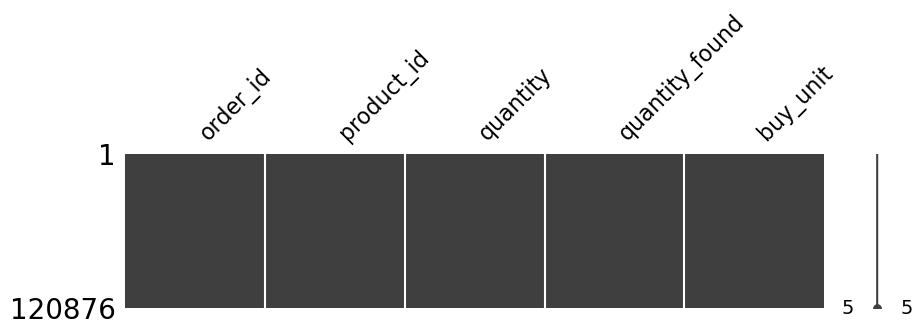

In [20]:
print("\n revision dataset: product_order")
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
# Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(countNaNDA(product_order))
msno.matrix(product_order, figsize = (10, 2))

## dataset purchase_order
1. ¿Los atributos de tipo de coordenadas, tienen una estructura correcta? <br>
1. ¿Los atributos de tipo tiempo (date, datetime, time, etc.), tienen una estructura correcta? <br>
1. ¿Qué valores tiene el atributo `dow`?<br>
1. ¿Existe alguna relación entre el `picker_id` y el `driver_id`? <br>
1. ¿Tiene valores perdidos? <br>
1. ¿Los atributos de tipo de coordenadas, tienen valores positivos y negativos? <br>

In [21]:
purchase_order[['lat', 'lng']].sample(n = 5)

,lat,lng
956,18.186.994.166.387.000,-10.036.174.630.168.500
6705,18.290.013.956.131.300,-10.035.312.802.779.700
2048,18.288.591.159.262.100,-10.030.867.984.992.300
7007,1.822.980.053.332.490,-10.040.732.437.661.000
1883,1.827.511.240.269.180,-10.030.801.412.827.900


Podemos apreciar que los atributos de coordenadas se encuentran en un formato incorrecto, por lo que se debe aplicar un tratamiento de datos.

In [22]:
purchase_order[['promised_time', 'promised_time', 'promised_time']].sample(n = 5)

,promised_time,promised_time,promised_time
5631,14:00:00,14:00:00,14:00:00
6443,19:50:00,19:50:00,19:50:00
1837,22:00:00,22:00:00,22:00:00
6076,10:00:00,10:00:00,10:00:00
5904,19:50:00,19:50:00,19:50:00


Podemos apreciar que los atributos `promised_time` y `promised_time` se encuentran en formato **HH:MM:SS** y que HH varia entre 0 y 23. El atributo `promised_time` se debe normalizar, debido a que tiene un formato incorrecto.

In [23]:
print("El atributo dow contiene los valores {}.\nEstos son consistentes con la informacion entregada.".format(', '.join(purchase_order.dow.sort_values().unique().astype(str))))

El atributo dow contiene los valores 0, 1, 2, 3, 4, 5, 6.
Estos son consistentes con la informacion entregada.


In [24]:
purchase_order['same_picker_shopper'] = where(purchase_order.picker_id == purchase_order.driver_id, 1, 0)

In [25]:
print("Existen {} ordenes donde se presenta el mismo picker_id y driver_id, a falta de un dataset de driver_id, podemos inferir que la misma persona que prepara el pedido realiza el reparto."
      .format(purchase_order[purchase_order['same_picker_shopper'] == 1]['same_picker_shopper'].count().astype(str)))

Existen 7079 ordenes donde se presenta el mismo picker_id y driver_id, a falta de un dataset de driver_id, podemos inferir que la misma persona que prepara el pedido realiza el reparto.


In [26]:
print("Existen {} ordenes donde se presenta distinto picker_id y driver_id, podemos inferir que son distintas personas, una prepara el pedido y otra realiza el reparto."
      .format(purchase_order[purchase_order['same_picker_shopper'] == 0]['same_picker_shopper'].count().astype(str)))

Existen 216 ordenes donde se presenta distinto picker_id y driver_id, podemos inferir que son distintas personas, una prepara el pedido y otra realiza el reparto.


In [27]:
print("Existen {} picker_id y driver_id unicos y distintos que perticipan en el mismo pedido"
      .format(purchase_order[purchase_order['same_picker_shopper'] == 0][['picker_id', 'driver_id']].drop_duplicates().shape[0]))

Existen 189 picker_id y driver_id unicos y distintos que perticipan en el mismo pedido


In [28]:
print("Existen {} picker_id y driver_id unicos e iguales que perticipan en el mismo pedido"
      .format(purchase_order[purchase_order['same_picker_shopper'] == 1][['picker_id', 'driver_id']].drop_duplicates().shape[0]))

Existen 594 picker_id y driver_id unicos e iguales que perticipan en el mismo pedido



 revision dataset: purchase_order


,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,same_picker_shopper
total_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752.000,0.0
percent_missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.308,0.0


<AxesSubplot:>

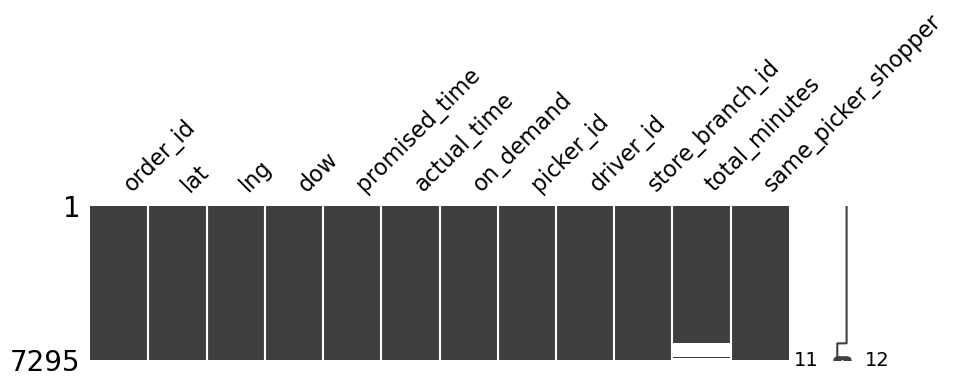

In [29]:
print("\n revision dataset: purchase_order")
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
    # Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(countNaNDA(purchase_order))
msno.matrix(purchase_order, figsize = (10, 2))

Para poder responder la pregunta: <br>
- ¿Los atributos de tipo de coordnadas, tienen valores positivos y negativos? <br>
    **R:** Debemos manipular un poco los valores de los atributos a analizar, para eso se procedera a eliminar los `.` y convertir a `int64` <br>

In [30]:
purchase_order['lat'] = purchase_order['lat'].map(lambda x: x.replace('.', '')).astype('int64')
purchase_order['lng'] = purchase_order['lng'].map(lambda x: x.replace('.', '')).astype('int64')

In [31]:
print("De un total de {} registros realizamos una inpeccion para revisar la latitud, se detecta que {} registros son mayores o igual a 0, mientras que {} registros son menores a 0"
      .format(purchase_order.shape[0], purchase_order[purchase_order['lat'] >= 0].shape[0], purchase_order[purchase_order['lat'] < 0].shape[0]))

De un total de 7295 registros realizamos una inpeccion para revisar la latitud, se detecta que 7295 registros son mayores o igual a 0, mientras que 0 registros son menores a 0


In [32]:
print("De un total de {} registros realizamos una inpeccion para revisar la longitud, se detecta que {} registros son mayores o igual a 0, mientras que {} registros son menores a 0"
      .format(purchase_order.shape[0], purchase_order[purchase_order['lng'] >= 0].shape[0], purchase_order[purchase_order['lng'] < 0].shape[0]))

De un total de 7295 registros realizamos una inpeccion para revisar la longitud, se detecta que 0 registros son mayores o igual a 0, mientras que 7295 registros son menores a 0


## dataset store
1. ¿Los atributos de tipo de coordenadas, tienen una estructura correcta? <br>
1. ¿Qué relacion existe entre `store` y `store_branch_id`?
1. ¿Tiene valores perdidos? <br>
1. ¿Los atributos de tipo de coordenadas, tienen valores positivos y negativos? <br>

In [33]:
store[['lat', 'lng']].sample(n = 5)

,lat,lng
84,1.836.874.155.493.370,-10.037.572.261.423.700
60,18.165.142.821.522.700,-10.030.664.196.226.900
25,1.823.190.132.492.320,-1.003.035.533.737.440
83,182.649.314.661.588,-10.039.841.461.287.000
23,18.365.107.934.767.300,-10.028.560.071.958.400


Podemos apreciar que los atributos de coordenadas se encuentran en un formato incorrecto, por lo que se debe aplicar un tratamiento de datos.

In [34]:
store[['store_branch_id', 'store']].head(n = 5)

,store_branch_id,store
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0
1,3ddd4c29cab4178d89d549c6ba65c236,044d56734d20e04984d846dade6d39f3
2,e9763f24fd46d0b9e52d423207a87c3c,452ae015bf846e1d2932b7ea15720d64
3,49b7d60d6095a9f1129ce798102b62f4,6447951cd071f6f045fd4e6194920926
4,8f21cfda17b340aeee062220d0bee8e5,452ae015bf846e1d2932b7ea15720d64


In [35]:
store[store['store_branch_id'] == 'cf0895f1e3beb8164f0a86e6f940ae56']

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100


In [36]:
store[store['store'] == 'c0b93cf93cf854981b8d6bd849eec4b0']

,store_branch_id,store,lat,lng
0,cf0895f1e3beb8164f0a86e6f940ae56,c0b93cf93cf854981b8d6bd849eec4b0,18.160.308.413.602.800,-10.026.067.265.111.100
16,fca97ea77e0dab3e3111d2fabf5d8b9d,c0b93cf93cf854981b8d6bd849eec4b0,1.823.107.417.063.180,-100.317.464.672.742
19,e67f4786f2429d047af4f12a9caa6cb1,c0b93cf93cf854981b8d6bd849eec4b0,18.237.641.099.820.400,-1.003.273.064.759.380
26,25b1e6be606fe62b5770a5bfaf25bfec,c0b93cf93cf854981b8d6bd849eec4b0,18.373.304.616.706.400,-10.041.115.283.045.200
38,d63b1919fe2cf76f494521dfa4389488,c0b93cf93cf854981b8d6bd849eec4b0,1.831.327.713.146.210,-10.036.062.199.825.000
42,98f1ed7ef085ea37c8c55c5c2fa71593,c0b93cf93cf854981b8d6bd849eec4b0,18.187.148.949.323.000,-10.035.173.619.197.300
52,df31bc775fd577864c647b176ad23382,c0b93cf93cf854981b8d6bd849eec4b0,18.217.433.099.402.400,-1.004.165.830.293.850
55,83c1570496a3ead7f4202afb827d59bb,c0b93cf93cf854981b8d6bd849eec4b0,18.285.241.293.837.600,-10.030.633.356.266.500
60,7c5c15309c5aecf4009261f4de305f6b,c0b93cf93cf854981b8d6bd849eec4b0,18.165.142.821.522.700,-10.030.664.196.226.900
94,75d034354b7c54e65b50193f8f987386,c0b93cf93cf854981b8d6bd849eec4b0,1.829.185.581.810.960,-1.003.237.906.869.140


Mediante una inspeccion visual, podemos verificar que por cada `store` existe al menos 1 `store_branch_id`, esto concuerda con la referencia que hace el nombre de cada atributo, en donde uno es la tienda y el otro es la sucursal.


 revision dataset: store


,store_branch_id,store,lat,lng
total_missing,0.0,0.0,0.0,0.0
percent_missing,0.0,0.0,0.0,0.0


<AxesSubplot:>

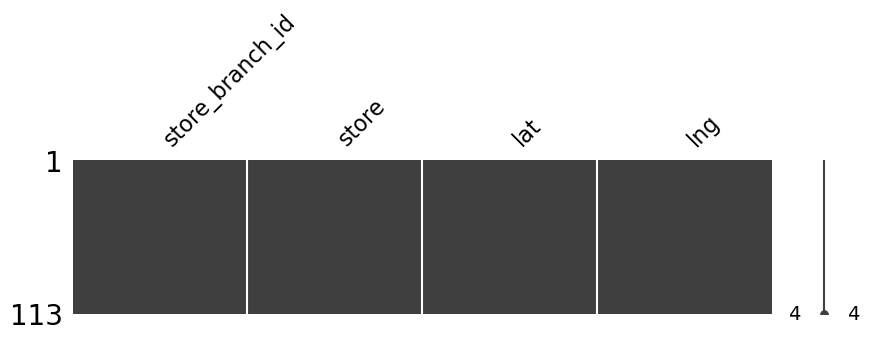

In [37]:
print("\n revision dataset: store")
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
    # Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(countNaNDA(store))
msno.matrix(store, figsize = (10, 2))

Para poder responder la pregunta: <br>
- ¿Los atributos de tipo de coordenadas, tienen valores positivos y negativos? <br>
    **R:** Debemos manipular un poco los valores de los atributos a analizar, para eso se procedera a eliminar los `.` y convertir a `int64` <br>

In [38]:
store['lat'] = store['lat'].map(lambda x: x.replace('.', '')).astype('int64')
store['lng'] = store['lng'].map(lambda x: x.replace('.', '')).astype('int64')

In [39]:
print("De un total de {} registros realizamos una inspeccion para revisar la latitud, se detecta que {} registros son mayores o igual a 0, mientras que {} registros son menores a 0"
      .format(store.shape[0], store[store['lat'] >= 0].shape[0], store[store['lat'] < 0].shape[0]))

De un total de 113 registros realizamos una inspeccion para revisar la latitud, se detecta que 113 registros son mayores o igual a 0, mientras que 0 registros son menores a 0


In [40]:
print("De un total de {} registros realizamos una inspeccion para revisar la longitud, se detecta que {} registros son mayores o igual a 0, mientras que {} registros son menores a 0"
      .format(store.shape[0], store[store['lng'] >= 0].shape[0], store[store['lng'] < 0].shape[0]))

De un total de 113 registros realizamos una inspeccion para revisar la longitud, se detecta que 0 registros son mayores o igual a 0, mientras que 113 registros son menores a 0


## dataset shopper
1. ¿Cuántas categorías de `seniority` existen? <br>
1. ¿Cuál es la distribucion de las categorías de `seniority`? <br>
1. ¿Cuál es el intervalo de las distintas clasificaciones (notas)? <br>
1. ¿Tiene valores perdidos? <br>

In [41]:
print("Se pueden apreciar las siguientes categorias: {}".format(', '.join(shopper.seniority.unique())))

Se pueden apreciar las siguientes categorias: ADVANCED, INTERMEDIATE, REVIEW, BEGINNER


In [42]:
shopper[['seniority']].groupby('seniority').size().reset_index(name = 'total').sort_values('total', ascending = False)

,seniority,total
0,ADVANCED,268
2,INTERMEDIATE,204
3,REVIEW,99
1,BEGINNER,29


<AxesSubplot:xlabel='seniority', ylabel='count'>

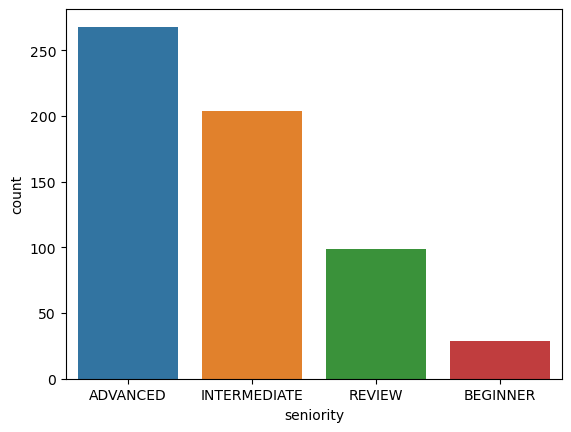

In [43]:
sns.countplot(x = 'seniority', data = shopper)


 revision dataset: shopper


,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating
total_missing,0.0,0.0,36.0,0.0,6.0,34.000
percent_missing,0.0,0.0,6.0,0.0,1.0,5.667


<AxesSubplot:>

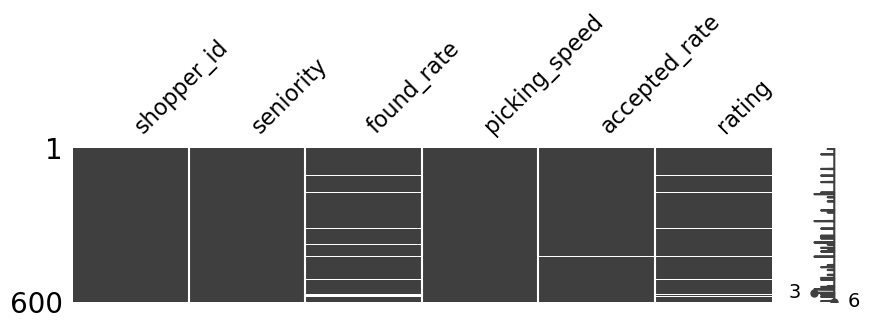

In [44]:
print("\n revision dataset: shopper")
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
# Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(countNaNDA(shopper))
msno.matrix(shopper, figsize = (10, 2))